# Formati dati 4 Challenge

## [Scarica zip esercizi](../_static/generated/formats.zip)

[Naviga file online](https://github.com/DavidLeoni/softpython-it/tree/master/formats)


## 1. Cure termali

✪✪ Un centro benessere accoglie clienti che possono decidere di usufruire tra uno o più servizi. Il centro segna queste informazioni in un file [centro-benessere1.csv](centro-benessere1.csv) mettendo `1` se il servizio viene erogato, altrimenti `0`: 

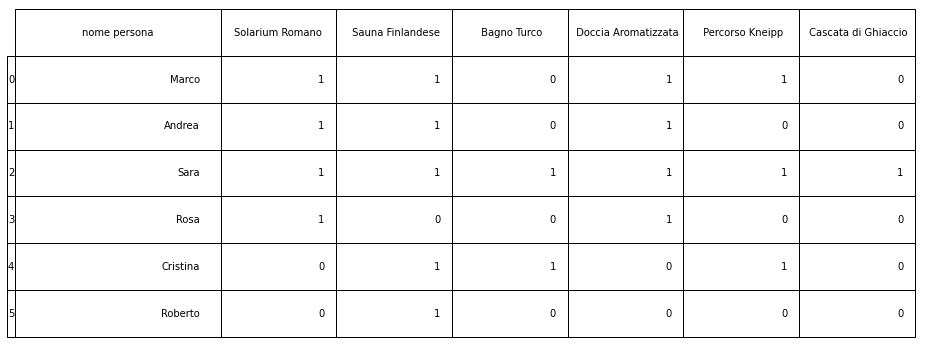

Ogni servizio ha lo stesso `costo_unitario=100` euro, e il centro vuole conoscere la spesa totale per ciascun cliente.

Scrivi una funzione `terme` che dato il nome di un file, lo legge e RITORNA un dizionario che associa a ciascuna persona il conto da saldare.

* **USA** il `csv.reader`, con encoding `utf-8`
* **NON** scrivere la costante `100` nel codice

**Esempio**:

```python
>>> terme('centro-benessere.csv')

{'Marco':    400,
 'Andrea':   300,
 'Sara':     600, 
 'Rosa':     200, 
 'Cristina': 300, 
 'Roberto':  100}
```    

In [2]:
import csv

costo_unitario = 100  # euro

def terme(nome_file):
    pass # IMPLEMENTAMI
    
    

res1 = terme('centro-benessere1.csv')
print(res1)
assert res1 == { 'Marco':    400,
                 'Andrea':   300,
                 'Sara':     600,
                 'Rosa':     200,
                 'Cristina': 300,
                 'Roberto':  100}

res2 = terme('centro-benessere2.csv')
#print(res2)
assert res2 == { 'Giulio': 300,
                 'Sabina': 100 }

{'Marco': 400, 'Andrea': 300, 'Sara': 600, 'Rosa': 200, 'Cristina': 300, 'Roberto': 100}


## 2. Personaggi storici del Trentino 

✪✪✪ Requisiti: Formato file CSV, matrici di liste, dizionari

Oggi faremo un salto nella storia analizzando il dataset [personaggi-storici-trentino.csv](personaggi-storici-trentino.csv)

Sorgente dati: Provincia Autonoma di Trento, [dati.trentino.it](https://dati.trentino.it/dataset/personaggi-storici-trentini)

Dal dataset estrarremo 3 colonne: `Nome`, `Luogo di Nascita` e `Data di nascita`

## 2.1 Il primo parsing

a) Leggi una riga alla volta dall'originale come lista, costruisci una NUOVA riga di 3 colonne e sistema gli eventuali problemi riscontrati, facendo infine una STAMPA della riga sistemata:

- per leggere, usa l'encoding `'latin-1'`, altrimenti il file potrebbe non aprirsi proprio o potresti vedere strani caratteri invece delle accentate (verifica sia in Python, che aprendo in LibreOffice/Excel)

b) Converti 'sconosciuto' nella stringa vuota

<div class="alert alert-warning">
    
**ATTENZIONE alle stringhe** `'sconosciuto '` **con uno spazio alla fine !!!**
</div>

      
c) Converti le sigle di città in nomi estesi. A tal fine, usa il dizionario `province` definito più sotto
    
d) Se un nome o sigla di città NON è tra parentesi, metti il risultato tra parentesi, togliendo la virgola 

ESEMPI conversione luogo di nascita:

<div class="alert alert-warning">
 
**SCRIVI DEL CODICE GENERICO !**
    
**NON** METTERE QUESTI VALORI PARTICOLARI IN UN DIZIONARIO !

</div>    


```
sconosciuto        -> ''
Affori, MI         -> Affori (Milano)
Barcellona, ME     -> Barcellona (Messina)
Castel Noarna (TN) -> Castel Noarna (Trento)
Mocenigo di Rumo (Valle di Non - TN) -> Mocenigo di Rumo (Valle di Non - Trento)
Montecosaro,MC     -> Montecosaro (Macerata)
Pieve Tesino (TN)  -> Pieve Tesino (Trento)
Pomarolo (TN)      -> Pomarolo (Trento)
Sacco di Rovereto, Trento -> Sacco di Rovereto (Trento)
San Lorenzo Bellizzi, CO  -> San Lorenzo Bellizzi (Como)
Sesto San Giovanni, MI    -> Sesto San Giovanni (Milano)
Taio (TN)          -> Taio (Trento)
Volterra, PI       -> Volterra (Pisa)
```

In [3]:

# Servono solo queste, non dovrebbero esserci casi diversi da questi
# Al massimo, pensa ad un meccanismo per gestire le eccezioni

province = {
    'TN': 'Trento',
    'PI': 'Pisa',
    'MC': 'Macerata',
    'CO': 'Como',
    'ME': 'Messina',
    'MI': 'Milano'
}


import csv

# scrivi dopo qui
        


## 2.2 Scrittura output

Dopo aver risolto il punto precedente, scrivi un CSV `output-personaggi.csv` contenente le righe come appena sistemate:

- l'header del csv di output deve essere tutto minuscolo: 
  
```
nome, luogo di nascita, data di nascita
```
    
- invece di `latin-1`, solo per scrivere usa la codifica `'utf-8'`

## 2.3 Il secolo

Prova ad aggiungere una colonna `'secolo'`, che contenga solo il secolo, nel formato a 3 o 4 cifre e sempre con 2 zeri:

- Se il tuo codice fallisce su alcune date tirando eccezioni, prova ad usare un `try except` per gestire eventuali problemi

- **SUGGERIMENTO**: Per capire se un carattere è una cifra, usa il    metodo  `.isdigit()`:

```python
'4'.isdigit()    # True
'423'.isdigit()  # True
'3k2'.isdigit()  # False
```

Mettiamo qualche esempio di trasformazione:

```
1672 -> 1600
13/05/1702 -> 1700
4 febbraio 1875 -> 1800
Fine del 300 -> 300
Prima meta del 900 -> 900
```

Alcuni casi sono piuttosto particolari, e per semplicità consideriamo solo l'ultima data:

```
A cavallo fra il 600 e il 700 -> 700
```

I casi più difficili sono con i numeri romani, ci sono vari modi per risolverlo, per semplicità puoi usare il dizionario `secoli` che ti forniamo noi che mappa per es. i primi venti numeri romani al relativo anno, e poi scansionando le date se trovi una corrispondenza applichi la sostituzione

```
   IV secolo -> 300
   prima meta dell'XI secolo -> 1000
   A cavallo tra l'XI e il XII secolo -> 1100
```

In [4]:
secoli = {
     'I': 0,
     'II':100,
     'III':200,
     'IV':300,
     'V':400,
     'VI':500,
     'VII':600,
     'VIII':700,
     'IX':800,
     'X':900,
     'XI':1000,
     'XII':1100,
     'XIII':1200,
     'XIV': 1300,
     'XV':1400,
     'XVI':1500,
     'XVII':1600,
     'XVIII':1700,
     'XIX':1800,
     'XIX':1900,
     'XX':2000,
}

## 2.4 Controlla

Se hai processato correttamente il dataset, dovresti aver ottenuto un output come questo: [output-atteso-personaggi.csv](https://github.com/DavidLeoni/softpython-it/blob/master/formats/output-atteso-personaggi.csv)

Per controllare, prova ad aggiungere questo codice in fondo al tuo, se non mostra messaggi d'errore dovresti avere un file corretto

In [ ]:

with open('output-atteso-personaggi.csv', encoding='utf8', newline='') as f_atteso:
    with open('output-personaggi.csv', encoding='utf8', newline='') as f_output:

        lettore_atteso = csv.reader(f_atteso, delimiter=',')
        lettore_output = csv.reader(f_output, delimiter=',')

        linee_attese = list(lettore_atteso)
        linee_output = list(lettore_output)
        
        if len(linee_attese) != len(linee_output):
            print('ERRORE: dimensioni file diverse!!')
            print('   Attese: ', len(linee_attese), 'righe')
            print('   Trovate: ', len(linee_output), 'righe')
        else:    
            for i in range(len(linee_attese)):
                if linee_attese[i] != linee_output[i]:
                    print("ERRORE riga", i+1)
                    print("   Atteso:", linee_attese[i])
                    print("  Trovato:", linee_output[i])
